In [1]:
######### In this notebook i just used numerical features and their correlation with target is >=0.6 ###########
import pandas as pd
import numpy as np
from scipy import stats
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import seaborn as sns
from sklearn import datasets, linear_model
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from sklearn import preprocessing
le = preprocessing.LabelEncoder()





df_train = pd.read_csv('/home/luffy/Documents/all/train.csv')
df_test = pd.read_csv('/home/luffy/Documents/all/test.csv')

In [2]:
def pearson_r(x,y): ######### function to find pearson's correlation 
    
    corr_mat = np.corrcoef(x,y)
    return corr_mat[0,1]

In [3]:
encoded=[]                  ####### Encoding both df_tarin and df_test 
for col in df_train.columns:
    if df_train[col].dtypes=='object':
         encoded=le.fit_transform(df_train[col].astype('str'))
         df_train[col]=encoded
         encoded=le.fit_transform(df_test[col].astype('str'))
         df_test[col]=encoded


In [4]:
df_train.isnull().sum() ####### checking if NAN exist in df_train

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
Alley              0
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType         0
MasVnrArea         8
ExterQual          0
ExterCond          0
Foundation         0
                ... 
BedroomAbvGr       0
KitchenAbvGr       0
KitchenQual        0
TotRmsAbvGrd       0
Functional         0
Fireplaces         0
FireplaceQu        0
GarageType         0
GarageYrBlt       81
GarageFinish       0
GarageCars         0
GarageArea         0
GarageQual         0
GarageCond         0
PavedDrive         0
WoodDeckSF         0
OpenPorchSF  

In [5]:
df_test.isnull().sum()   ##checking if NAN exist in df_test 

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      227
LotArea            0
Street             0
Alley              0
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType         0
MasVnrArea        15
ExterQual          0
ExterCond          0
Foundation         0
                ... 
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
KitchenQual        0
TotRmsAbvGrd       0
Functional         0
Fireplaces         0
FireplaceQu        0
GarageType         0
GarageYrBlt       78
GarageFinish       0
GarageCars         1
GarageArea         1
GarageQual         0
GarageCond         0
PavedDrive         0
WoodDeckSF   

In [6]:

from sklearn.preprocessing import Imputer#### Don't try to fill NAN in object type feature

imput = Imputer(strategy='mean')
#X_train['MasVnrType']=pd.DataFrame(imput.fit_transform(X_train['MasVnrType']))  ###### wrong,try converting object into int64 type

for col in df_train.columns:   ######## using imputer classs to fill NAN with  means of the repective column
    if df_train[col].isnull().any():
        imputed=pd.DataFrame(imput.fit_transform(df_train[[col]]))
        df_train[[col]]=imputed
        print(col)
        
print(df_train.isnull().sum())##checking whether features have NAN values in dataset

LotFrontage
MasVnrArea
GarageYrBlt
Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
Alley            0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
                ..
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd     0
Functional       0
Fireplaces       0
FireplaceQu      0
GarageType       0
GarageYrBlt      0
GarageFinish     0
GarageCars       0
GarageArea       0
GarageQual       0
GarageCond       0
PavedDrive       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch    

In [7]:
for col in df_test.columns:
    if df_test[col].isnull().any():
        imputed=pd.DataFrame(imput.fit_transform(df_test[[col]]))
        df_test[[col]]=imputed
        print(col)
        
print(df_test.isnull().sum())##checking whether features have NAN values in dataset

LotFrontage
MasVnrArea
BsmtFinSF1
BsmtFinSF2
BsmtUnfSF
TotalBsmtSF
BsmtFullBath
BsmtHalfBath
GarageYrBlt
GarageCars
GarageArea
Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
Alley            0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
                ..
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd     0
Functional       0
Fireplaces       0
FireplaceQu      0
GarageType       0
GarageYrBlt      0
GarageFinish     0
GarageCars       0
GarageArea       0
GarageQual       0
GarageCond       0

In [8]:
Y_train=df_train.SalePrice
column=[]
for col in df_train.columns:######### finding correlation between numerical feature and target class
    if col!='SalePrice' and pearson_r(df_train[col],Y_train)>=0.5:
        column.append(col)
X_train=df_train[column]
X_test=df_test[column]

print(X_train)

      OverallQual  YearBuilt  YearRemodAdd  TotalBsmtSF  1stFlrSF  GrLivArea  \
0               7       2003          2003          856       856       1710   
1               6       1976          1976         1262      1262       1262   
2               7       2001          2002          920       920       1786   
3               7       1915          1970          756       961       1717   
4               8       2000          2000         1145      1145       2198   
5               5       1993          1995          796       796       1362   
6               8       2004          2005         1686      1694       1694   
7               7       1973          1973         1107      1107       2090   
8               7       1931          1950          952      1022       1774   
9               5       1939          1950          991      1077       1077   
10              5       1965          1965         1040      1040       1040   
11              9       2005          20

In [9]:
column.append('SalePrice')
column

['OverallQual',
 'YearBuilt',
 'YearRemodAdd',
 'TotalBsmtSF',
 '1stFlrSF',
 'GrLivArea',
 'FullBath',
 'TotRmsAbvGrd',
 'GarageCars',
 'GarageArea',
 'SalePrice']

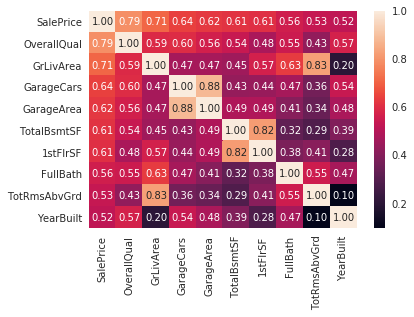

In [10]:


#saleprice correlation matrix


#correlation matrix
corrmat = df_train.corr()
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df_train[cols].values.T)
sns.set(font_scale=1)
hm = sns.heatmap(cm, cbar=True, annot=True, square=False, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [11]:


from sklearn.preprocessing import Imputer#### Don't try to fill NAN in object type feature

imput = Imputer(strategy='mean')
#X_train['MasVnrType']=pd.DataFrame(imput.fit_transform(X_train['MasVnrType']))  ###### wrong,try converting object into int64 type

for col in X_test.columns:
    if X_test[col].isnull().any():
        imputed=pd.DataFrame(imput.fit_transform(X_test[[col]]))
        X_test[[col]]=imputed
        print(col)
        
print(X_test.isnull().sum())##checking whether features have NAN values in dataset

OverallQual     0
YearBuilt       0
YearRemodAdd    0
TotalBsmtSF     0
1stFlrSF        0
GrLivArea       0
FullBath        0
TotRmsAbvGrd    0
GarageCars      0
GarageArea      0
dtype: int64


In [12]:
 from sklearn import linear_model
reg = linear_model.Lasso(alpha = 0.1)
reg.fit(X_train,Y_train)
predictions=reg.predict(X_test)
sol=pd.DataFrame({'Id':range(1461,2920,1)})
sol['SalePrice']=predictions
#sol=pd.DataFrame(predictions)
print(sol)

        Id      SalePrice
0     1461  110137.155042
1     1462  159059.844684
2     1463  169684.056341
3     1464  188059.821027
4     1465  219782.187376
5     1466  182152.023100
6     1467  175453.990159
7     1468  175115.020201
8     1469  210229.301992
9     1470  102017.781716
10    1471  210420.491777
11    1472  119310.154832
12    1473  107391.686639
13    1474  164581.036605
14    1475  146068.189629
15    1476  328671.697137
16    1477  268102.507089
17    1478  296230.238455
18    1479  286759.454746
19    1480  387049.953809
20    1481  302944.102625
21    1482  235072.571906
22    1483  190566.123231
23    1484  195564.822903
24    1485  184861.210858
25    1486  214427.739760
26    1487  313877.216117
27    1488  270342.207910
28    1489  207292.189884
29    1490  204319.637044
...    ...            ...
1429  2890   49252.009222
1430  2891  156310.324450
1431  2892   13589.693027
1432  2893  100031.178428
1433  2894   18584.541661
1434  2895  265680.567135
1435  2896  

In [13]:
sol.to_csv('/home/luffy/Documents/all/ans.csv')####storing solution in ans.csv